In [1]:
import pandas as pd
import numpy as np

Load dataset

In [2]:
data = pd.read_csv("/content/lois_continuous.csv")

Show details

In [3]:
data.columns

Index(['FID', 'ID', 'SITE_NAME', 'DATE', 'PH', 'Conductivity ', 'OxygenCount',
       'Temperature', 'Battery'],
      dtype='object')

In [4]:
data.head(10)

,FID,ID,SITE_NAME,DATE,PH,Conductivity,OxygenCount,Temperature,Battery
0,29033,S1,Swale at Catterick Bridge,27/06/1995 11:00,8.27,411.0,102.2,16.8,13.0
1,29033,S1,Swale at Catterick Bridge,27/06/1995 11:30,8.31,412.0,105.8,17.2,13.0
2,29033,S1,Swale at Catterick Bridge,27/06/1995 12:00,8.34,413.0,107.0,17.5,13.0
3,29033,S1,Swale at Catterick Bridge,27/06/1995 12:30,8.36,414.0,108.7,17.9,13.0
4,29033,S1,Swale at Catterick Bridge,27/06/1995 13:00,8.39,416.0,110.2,18.3,13.0
5,29033,S1,Swale at Catterick Bridge,27/06/1995 13:30,8.41,417.0,112.5,18.6,13.0
6,29033,S1,Swale at Catterick Bridge,27/06/1995 14:00,8.44,419.0,112.6,19.0,13.0
7,29033,S1,Swale at Catterick Bridge,27/06/1995 14:30,8.46,418.0,114.4,19.3,13.0
8,29033,S1,Swale at Catterick Bridge,27/06/1995 15:00,8.48,417.0,114.3,19.6,13.0
9,29033,S1,Swale at Catterick Bridge,27/06/1995 15:30,8.50,417.0,115.5,19.9,13.0


In [5]:
data.describe()

,FID,PH,Conductivity,OxygenCount,Temperature,Battery
count,2.351200e+05,235119.000000,234538.000000,226434.000000,235119.000000,210370.000000
mean,5.217107e+05,7.759112,771.956162,104.046351,10.479797,14.398177
std,7.183234e+05,0.468810,368.871777,1408.652813,5.642680,435.994489
min,2.903300e+04,3.520000,0.600000,0.000000,-0.500000,-0.100000
25%,2.904100e+04,7.400000,475.000000,69.400000,5.600000,12.100000
50%,2.904300e+04,7.770000,685.000000,88.800000,10.100000,12.800000
75%,1.552046e+06,8.050000,1087.000000,100.000000,15.000000,13.500000
max,1.584377e+06,9.850000,2689.000000,99999.000000,30.400000,99999.000000


In [6]:
len(data)

235120

Remove missing values

In [8]:
data = data.dropna()
len(data)

202613

In [9]:
data.columns.tolist()

['FID',
 'ID',
 'SITE_NAME',
 'DATE',
 'PH',
 'Conductivity ',
 'OxygenCount',
 'Temperature',
 'Battery']

Consider only relevant critical features

In [10]:
data = data[['PH','Conductivity ','Temperature','Battery','OxygenCount']]

#Detect Outliers

Method 1. Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


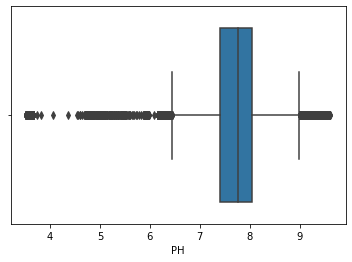

In [11]:
import seaborn as sns
sns.boxplot(data['PH'])

In [12]:
data = data[(data["PH"] < 9) & (data["PH"] > 6.5)]

In [13]:
len(data)

200526

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


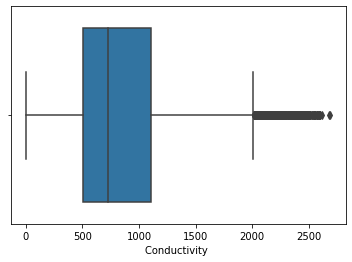

In [14]:
sns.boxplot(data['Conductivity '])

In [15]:
data = data[(data["Conductivity "] < 2000) & (data["Conductivity "] > 0)]

In [16]:
len(data)

200078

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


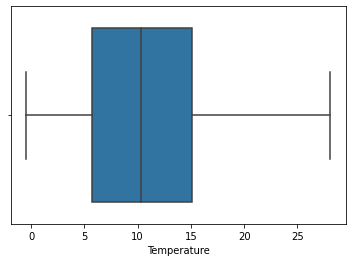

In [17]:
sns.boxplot(data['Temperature'])

In [18]:
data = data[(data["Temperature"] < 30) & (data["Temperature"] > 0)]

In [19]:
len(data)

199378

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


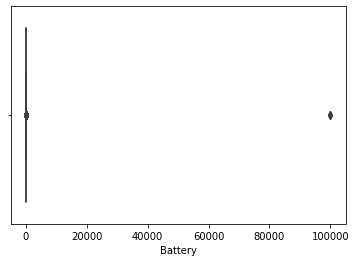

In [20]:
sns.boxplot(data['Battery'])

No Categorical features to encode So skipping that phase



#Univariate analysis. 
This is when you analyze a **single** **feature**, and the most common two techniques for this are

 1) Remove features with low variance 

 
 2) Remove features that have a high amount of missing values.

##Remove features with low variance

In [23]:
from sklearn.feature_selection import VarianceThreshold

variance = VarianceThreshold(threshold = (.9 * (1 - .9)))
variance.fit(data)

variance.get_support()

array([ True,  True,  True,  True,  True])

There is no feature with low variance

##Remove features with missing values

In [24]:
data = data.dropna()
len(data)

199378

#Bi-Variate analysis

#Filter based methods

##Identify highly correlated features.

In [25]:
data_cor=data.corr()
data_cor

,PH,Conductivity,Temperature,Battery,OxygenCount
PH,1.000000,-0.345254,-0.082669,-0.002428,0.002847
Conductivity,-0.345254,1.000000,0.292360,-0.003717,0.003416
Temperature,-0.082669,0.292360,1.000000,-0.000749,0.007515
Battery,-0.002428,-0.003717,-0.000749,1.000000,-0.000011
OxygenCount,0.002847,0.003416,0.007515,-0.000011,1.000000


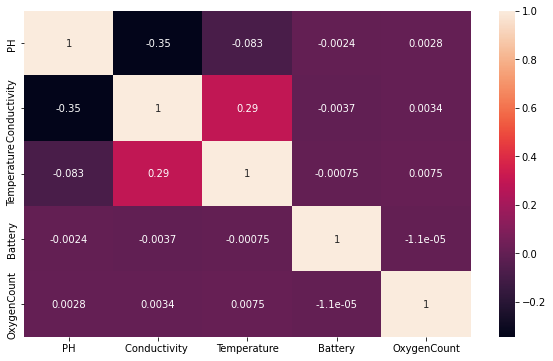

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.heatmap(data_cor, annot=True)

From the above correlation metrix, we could identify that there is no correlated features to remove

#Wrapper based methods

1-SequentialFeatureSelector

In [27]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

X = data.drop('OxygenCount', axis=1)
y = data[['OxygenCount']]


In [28]:
y = y.values.ravel()

In [29]:
y.shape

(199378,)

In [30]:
X.shape

(199378, 4)

Scaling the features

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
X_test

array([[4.27419355e-01, 3.04304304e-01, 2.07142857e-01, 1.31001179e-04],
       [6.16935484e-01, 3.45845846e-01, 4.28571429e-01, 1.28001152e-04],
       [2.62096774e-01, 5.98098098e-01, 4.78571429e-01, 1.23001107e-04],
       ...,
       [3.26612903e-01, 6.34134134e-01, 2.60714286e-01, 1.36001224e-04],
       [3.95161290e-01, 6.20620621e-02, 3.07142857e-01, 1.35001215e-04],
       [7.41935484e-01, 4.92492492e-01, 3.85714286e-01, 1.29001161e-04]])

In [33]:
X_train

array([[6.04838710e-01, 6.62662663e-01, 6.85714286e-01, 1.38001242e-04],
       [9.71774194e-01, 2.00200200e-01, 6.42857143e-01, 1.34001206e-04],
       [6.25000000e-01, 2.90290290e-01, 4.57142857e-01, 1.39001251e-04],
       ...,
       [2.70161290e-01, 3.76376376e-01, 1.82142857e-01, 1.13001017e-04],
       [5.96774194e-01, 3.20820821e-01, 4.78571429e-01, 9.80008820e-05],
       [2.78225806e-01, 4.73473473e-01, 3.71428571e-01, 1.19001071e-04]])

In [ ]:
!pip install mlxtend

In [35]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [36]:
sfs = SFS(LinearRegression(),
          k_features='best',
          verbose=1,
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

In [37]:
sfs.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
Features: 4/4

SequentialFeatureSelector(estimator=LinearRegression(), k_features='best',
                          scoring='r2', verbose=1)

In [38]:
sfs.k_feature_names_ 

('Battery',)

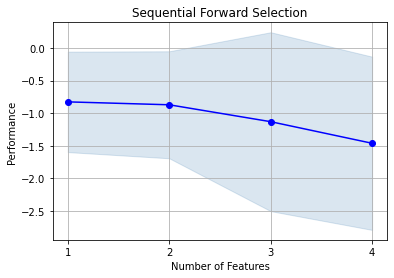

In [39]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [40]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[-0.4295356449369081, -0.004995442073238543, -...",-0.826537,"(Battery,)",0.990849,0.770914,0.385457
2,"(0, 3)","[-0.6680652580312587, -0.004788444773241807, -...",-0.871259,"(PH, Battery)",1.055786,0.821437,0.410719
3,"(0, 1, 3)","[-0.26015804597624803, -0.011192652805912306, ...",-1.130841,"(PH, Conductivity , Battery)",1.765003,1.373233,0.686616
4,"(0, 1, 2, 3)","[-1.6135625446095978, -0.013916863628949283, -...",-1.462484,"(PH, Conductivity , Temperature, Battery)",1.709364,1.329943,0.664972
